# Basic use of the mview module

In [1]:
import sys; sys.path.insert(0,"../")
import numpy as np
%matplotlib notebook

import mview

The mview module contains many ways to set up and solve MPSE problems. Here, we discuss the simplest way to use the module to set up and solve the most basic MPSE problem.

In this notebook, we will just consider the following set of dissimilarities: 32 nodes are assigned 3D coordinates, 3 distance matrices are computed, each by computing the distances between the nodes after being projected into 2D images by one of the standard orthogonal projections.

In [2]:
N = 32 #number of points
X = np.random.randn(N,3) #positions in 3D

Y1 = X[:,[1,2]] #projection of data into 2D, viewed from x-direction
Y2 = X[:,[2,0]]
Y3 = X[:,[0,1]]

from scipy.spatial import distance_matrix
D1 = distance_matrix(Y1,Y1) #pairwise distance matrix of Y1
D2 = distance_matrix(Y2,Y2)
D3 = distance_matrix(Y3,Y3)

## Using mview.basic()

The simplest way to use the mview module is via the function mview.basic. 

In its most basic form, this function does the following:

1) takes as input a list of distance/dissimilarity matrices $D=[D_1,D_2,\dots,D_K]$.

2) computes a random initial embedding and a random initial projection matrix for each dissimilarity matrix.

3) runs (an adaptive scheme of) gradient descent to find an embedding $X$ and projection parameters $Q = [Q_1,Q_2,\dots,Q_K]$ that minimize the MPSE stress function.

4) returns an instance of the MPSE class, which contains results, along with methods for plotting (or continuing computations).

The list of defaults is very large, so I'll cover them more optional parameters are introduced. But for now it is enough to know that by default mview.basic tries to find a 3D embedding by supposing that the given dissimilarity matrices correspond to distances from 2D images, each obtained from orthogonal projections from 3D to 2D.

In [3]:
mv = mview.basic([D1,D2,D3]) #most basic run of mview.basic

Here, the output mv is an object in the MPSE, containing all the results of the experiment. A list of the attributes is shown below (only some are relevant for the purposes of this introduction). 

The most relevant of these are the final embedding 'X', the final projection parameters 'Q', the final cost 'cost', the total time 'time', and the computation dictionary 'H', containing the cost history 'H["costs"]'.

In [4]:
print(mv.__dict__.keys())

dict_keys(['verbose', 'title', 'level', 'DD', 'D', 'K', 'N', 'd1', 'd2', 'family', 'constraint', 'proj', 'X', 'X_is_fixed', 'Q', 'Q_is_fixed', 'visualization_method', 'visualization', 'cost_function', 'cost_function_k', 'cost_function_all', 'F', 'FX', 'FQ', 'time', 'X0', 'Q0', 'Y', 'cost', 'individual_cost', 'H'])


The final embedding (after running the gradient descent scheme) is given by attribute 'X', as shown here:

In [5]:
print(mv.X)

[[-0.76530384 -0.95521545  1.41981242]
 [-0.42452393  1.07490654  0.02875216]
 [ 0.37576885  0.7858249  -0.87910916]
 [ 1.94502758 -0.98282094  0.19617019]
 [ 0.58512902 -0.61599726 -1.35463358]
 [ 0.17945463 -0.60782705  0.12272503]
 [-0.30723947  0.14078086 -1.52018891]
 [-0.6220913  -0.18152421 -0.75415151]
 [ 1.59435924 -0.6998553  -1.07706264]
 [-1.50252458 -0.01467214  0.78245806]
 [ 1.94899073  2.13437478 -0.25794747]
 [ 1.95242418  0.8133418  -0.34393159]
 [-1.48020483  0.54105845  0.24037439]
 [-0.59488241  1.51944087 -0.16545911]
 [ 0.03119376 -0.38985494 -1.66654693]
 [ 1.08570411  0.56871125  0.34010637]
 [-0.59553946 -0.21324612 -0.5144681 ]
 [-1.50561233  0.61343257  0.10847569]
 [-1.82927131  0.76997559  1.19888734]
 [ 2.07140806 -0.3933483   0.85095101]
 [-1.64457935 -0.66981606 -1.4578703 ]
 [-1.13876815  0.40986864 -1.62940715]
 [-1.56915347 -0.97281585  0.00292312]
 [-0.45363894 -0.4604337   0.29227726]
 [ 1.42326929 -2.42618645 -0.71385645]
 [-0.53470208  1.81267719

The final orthogonal matrices are given by the attribute 'Q'. Note that in this setup, these will be 2x3 matrices (since these are projections from 3D to 2D)

In [6]:
print(mv.Q)

[[[ 0.49707273  0.4191229   0.7597728 ]
  [-0.84521918  0.03581421  0.53321842]]

 [[-0.36892768  0.7969891  -0.47822667]
  [ 0.71049658  0.57354387  0.40772789]]

 [[-0.39942438  0.91438368 -0.0660504 ]
  [ 0.48792458  0.15103522 -0.8597197 ]]]


Even if the global minimum of the MPSE stress function was found, these projection matrices will not be the same as the standard projections matrices (what we used to produce the original dissimilarities), since the MPSE stress function is invariant under 'rotations' of the embedding and projections.

We can still check that these are orthogonal matrices and check whether these are orthogonal to each other (which may not be the case if the global minima was not found).

In [7]:
#These should be the identity matrix if the computed projection matrices is 
#orthogonal:
with np.printoptions(precision=3, suppress=True):
    for k in range(3):
        print(mv.Q[k] @ mv.Q[k].T)

[[ 1. -0.]
 [-0.  1.]]
[[1. 0.]
 [0. 1.]]
[[ 1. -0.]
 [-0.  1.]]


In [8]:
#These should be 0 if the normal to the projections are orthogonal to the others:
print(np.dot(np.cross(mv.Q[0][0],mv.Q[0][1]),
             np.cross(mv.Q[1][0],mv.Q[1][1])))
print(np.dot(np.cross(mv.Q[0][0],mv.Q[0][1]),
             np.cross(mv.Q[2][0],mv.Q[2][1])))
print(np.dot(np.cross(mv.Q[1][0],mv.Q[1][1]),
             np.cross(mv.Q[2][0],mv.Q[2][1])))

-8.656580285926196e-09
5.17158704749221e-09
8.938488102461228e-09


The final normalized MPSE (MDS) cost is given by the attribute 'cost'.

In [9]:
print(mv.cost)

2.4763469097271416e-10


The total computation time (in seconds) is given by attribute 'time'.

In [10]:
print(mv.time)

4.24301552772522


The computation history is given by attribute 'H'. This is a dictionary containing different specs in the computation, as shown below.

In [11]:
print(mv.H.keys())

dict_keys(['iterations', 'markers', 'costs', 'X_iters', 'X_steps', 'X_grads', 'X_lrs', 'Q_iters', 'Q_steps', 'Q_grads', 'Q_lrs'])


For example, the computed/estimated costs at each iteration are given by key 'costs' in this dictionary.

In [12]:
print(mv.H['costs'])

[2.27309523e-02 2.18422307e-02 1.72493909e-02 1.59817364e-02
 1.48521962e-02 1.37268562e-02 1.25693457e-02 1.11749326e-02
 9.79567294e-03 8.54833283e-03 7.30394825e-03 6.42591919e-03
 5.76945066e-03 5.25024919e-03 4.92769429e-03 4.70220567e-03
 4.55741674e-03 4.39072627e-03 4.05014104e-03 3.11912392e-03
 1.26435218e-03 9.07105465e-04 6.00776026e-04 5.00612235e-04
 4.74824296e-04 4.41549282e-04 3.94980333e-04 3.29454312e-04
 2.41270005e-04 1.76494629e-04 1.70030153e-04 1.16727557e-04
 1.05242706e-04 9.23100303e-05 7.49476023e-05 5.58021773e-05
 4.09745817e-05 3.26030631e-05 2.50358992e-05 2.07613819e-05
 1.78643383e-05 1.43343795e-05 1.09598537e-05 8.30470880e-06
 6.38795614e-06 5.28376583e-06 4.41063436e-06 3.87216142e-06
 3.21491560e-06 2.48353371e-06 1.86519698e-06 1.40543777e-06
 1.17255688e-06 9.65023827e-07 8.61047928e-07 7.33897294e-07
 5.67283967e-07 4.25198330e-07 3.63742534e-07 3.12145275e-07
 2.79119496e-07 2.41920752e-07 1.99903483e-07 1.57572814e-07
 1.19067625e-07 8.684555

## Quick plots

To plot the final embedding, we can use the MPSE method below.

Note: The 'axes' are the normal components to the computed projections (so in this case should be orthogonal to each other).

<IPython.core.display.Javascript object>


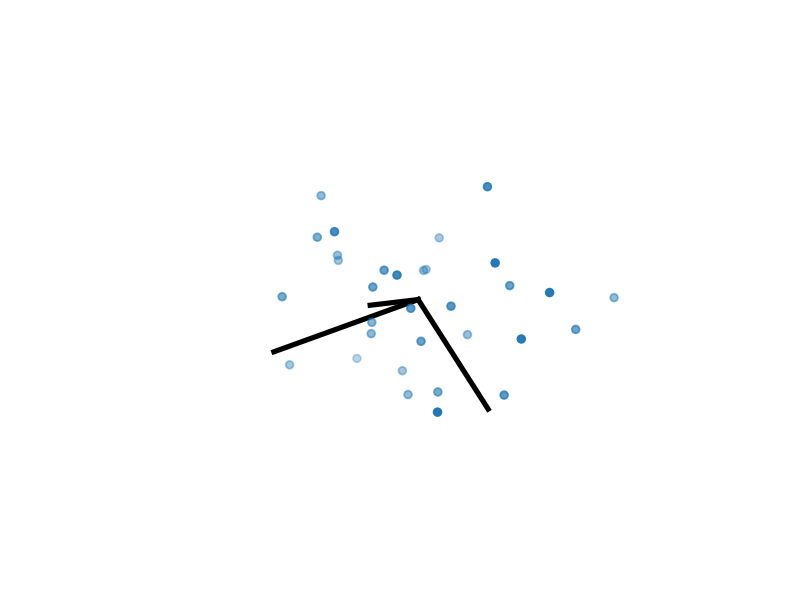

In [13]:
mv.figureX()

To plot the final projected images, use the MPSE method below.

Note: the colors are added automatically; the more gradual the change in the colors, the better the embedding (at least in this default setting).

<IPython.core.display.Javascript object>


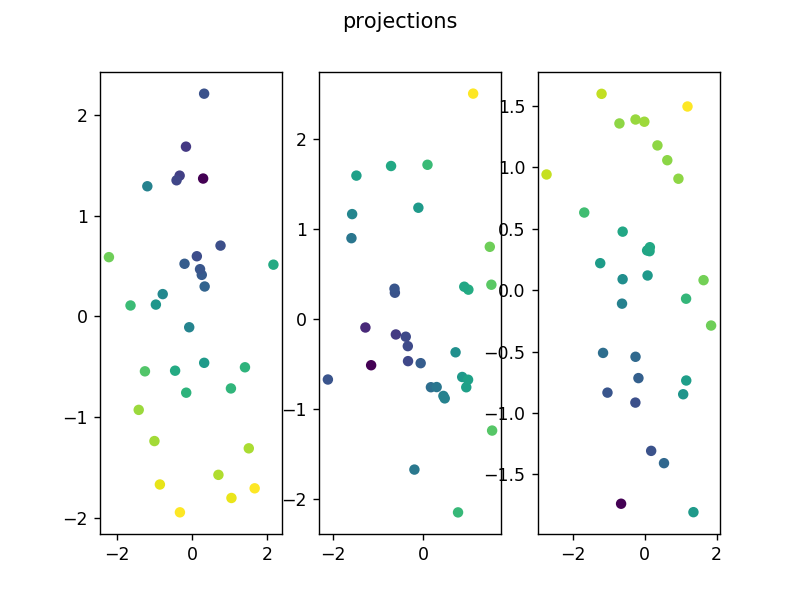

In [14]:
mv.figureY()

To plot the computation history, use the MPSE method below. The following quantities are plotted:

1) cost : stress (computed or estimated at each iteration)

2) gradient size : size of the gradient (root-mean-square of entries by default)

3) learning rate : learning rate used at each iteration (varies if using an adaptive scheme)

4) step size : the size of the step jump between iterations (root-mean-square of entires by default)

The last 3 quantities are given separately for the embedding $X$ and the projection parameters $Q$ (which we think as a $Kx2x3$ array containing all of the projection matrices).


<IPython.core.display.Javascript object>


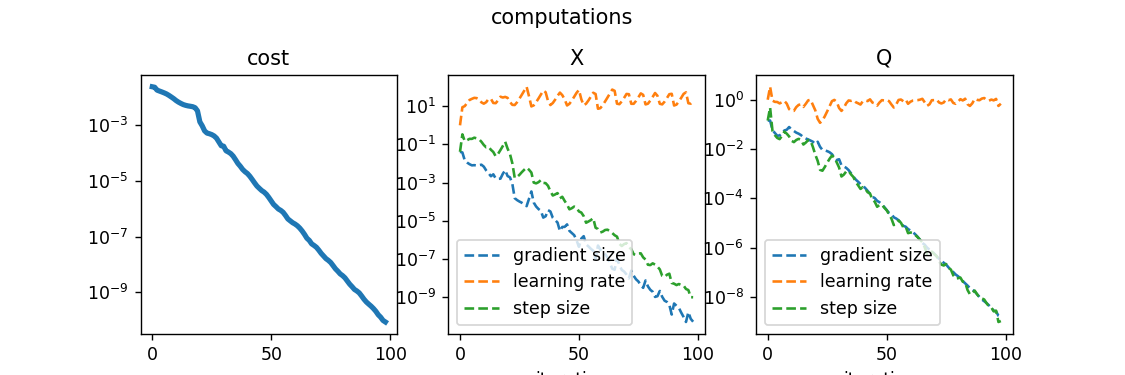

In [15]:
mv.figureH()

If this run of mview.basic didn't result in the global minima, make sure to run the whole notebook again!

## Other attributes of interest

The other attributes in the resulting MPSE object are not immediately of use to us, but I'll describe as the need arises. Other methods can be used on the MPSE object too (such as running a different GD scheme where we left off), and I'll describe those elsewhere.